# Sikka AI assessment challenge Task 1

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import random
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the given .csv files

item_categories = pd.read_csv('item_categories.csv')
item_categories.info()
item_categories.head()
# Check for missing values
print(item_categories.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB
item_category_name    0
item_category_id      0
dtype: int64


In [3]:
items = pd.read_csv('items.csv')
items.info()
items.head()
# Check for missing values
print(items.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
item_name           0
item_id             0
item_category_id    0
dtype: int64


In [4]:
sales = pd.read_csv('sales_train.csv')
sales.info()
sales.head()
# Check for missing values
print(sales.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [5]:
shops = pd.read_csv('shops.csv')
shops.info()
shops.head()
# Check for missing values
print(shops.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
shop_name    0
shop_id      0
dtype: int64


In [6]:
test = pd.read_csv('test.csv')
test.info()
test.head()
# Check for missing values
print(test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
ID         0
shop_id    0
item_id    0
dtype: int64


## EDA on sales_train dataset

In [7]:
# Overview of the dataset
print(sales.head())
print(sales.info())
print(sales.tail())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
               date  date_block_num  shop_id  item_id  item_price  \
2935844  10.10.2015              33       25     7409       299.0   
29358

In [8]:
# Summary statistics
print(sales.describe())

       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03


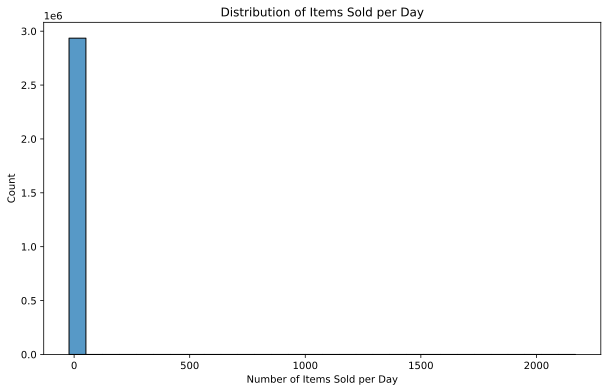

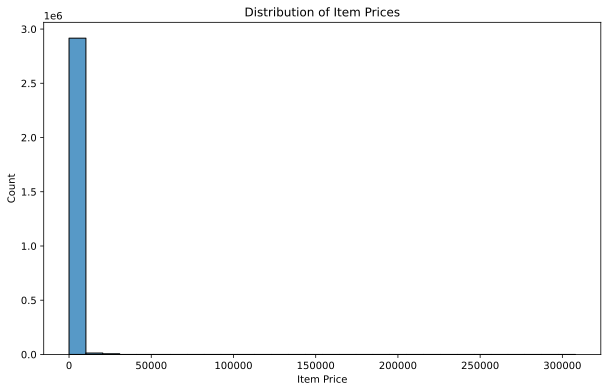

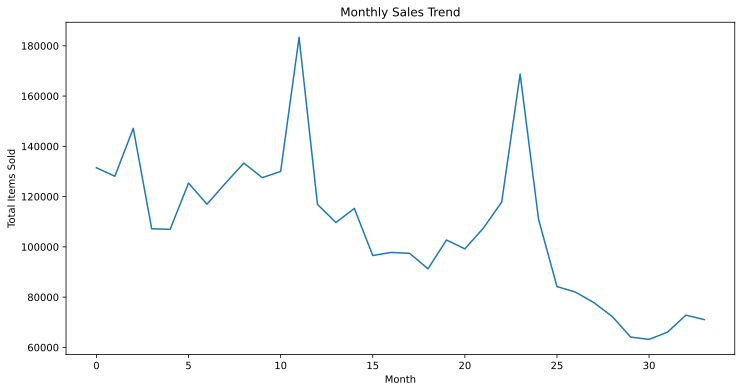

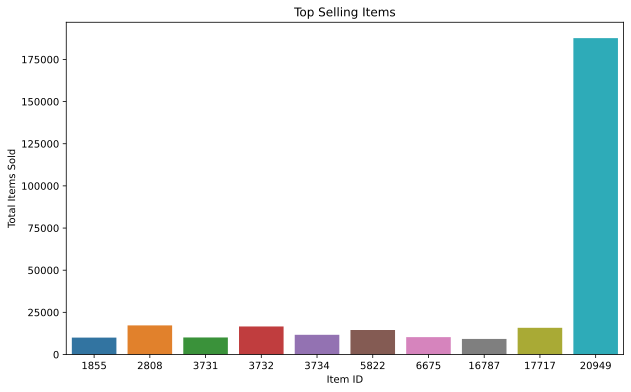

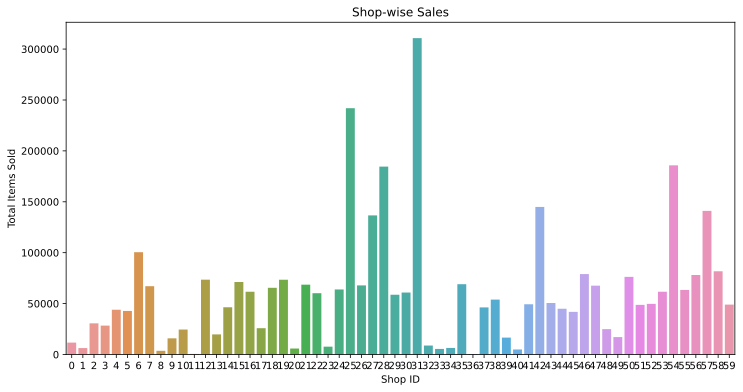

In [9]:
# Distribution of target variable (item_cnt_day)
plt.figure(figsize=(10, 6))
sns.histplot(sales['item_cnt_day'], bins=30)
plt.xlabel('Number of Items Sold per Day')
plt.ylabel('Count')
plt.title('Distribution of Items Sold per Day')
plt.show()

# Distribution of item prices
plt.figure(figsize=(10, 6))
sns.histplot(sales['item_price'], bins=30)
plt.xlabel('Item Price')
plt.ylabel('Count')
plt.title('Distribution of Item Prices')
plt.show()

# Monthly sales trend
monthly_sales = sales.groupby('date_block_num')['item_cnt_day'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_block_num', y='item_cnt_day', data=monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Items Sold')
plt.title('Monthly Sales Trend')
plt.show()

# Top selling items
top_selling_items = sales.groupby('item_id')['item_cnt_day'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_items.index, y=top_selling_items.values)
plt.xlabel('Item ID')
plt.ylabel('Total Items Sold')
plt.title('Top Selling Items')
plt.show()

"""
# Shop-wise sales
shop_sales = sales.groupby('shop_id')['item_cnt_day'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=shop_sales.index, y=shop_sales.values)
plt.xlabel('Shop ID')
plt.ylabel('Total Items Sold')
plt.title('Shop-wise Sales')
plt.show()
"""


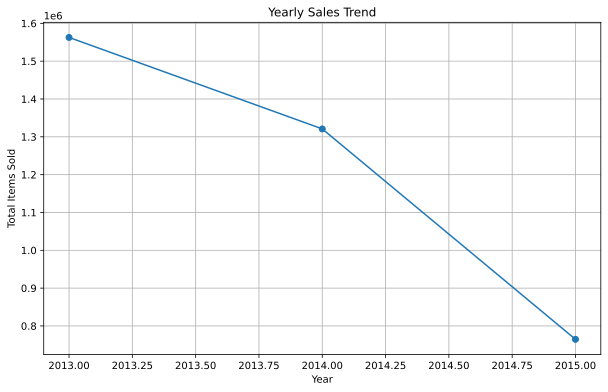

In [10]:
# Extract the year from the date
sales['year'] = pd.to_datetime(sales['date']).dt.year

# Calculate total sales for each year
yearly_sales = sales.groupby('year')['item_cnt_day'].sum()

# Plotting the sales trend for each year
plt.figure(figsize=(10, 6))
yearly_sales.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Total Items Sold')
plt.title('Yearly Sales Trend')
plt.grid(True)
plt.show()

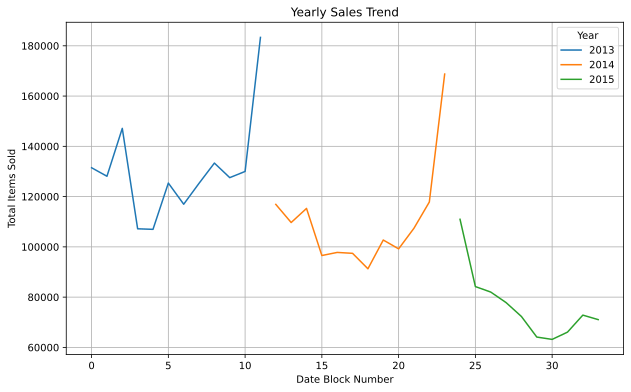

In [11]:
# Calculate total sales for each year
yearly_sales = sales.groupby(['year', 'date_block_num'])['item_cnt_day'].sum().reset_index()

# Plotting the sales trend for each year
plt.figure(figsize=(10, 6))
for year in yearly_sales['year'].unique():
    year_data = yearly_sales[yearly_sales['year'] == year]
    plt.plot(year_data['date_block_num'], year_data['item_cnt_day'], label=str(year))

plt.xlabel('Date Block Number')
plt.ylabel('Total Items Sold')
plt.title('Yearly Sales Trend')
plt.legend(title='Year')
plt.grid(True)
plt.show()

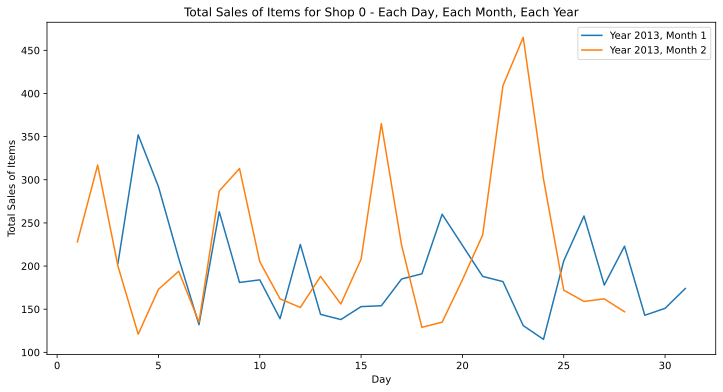

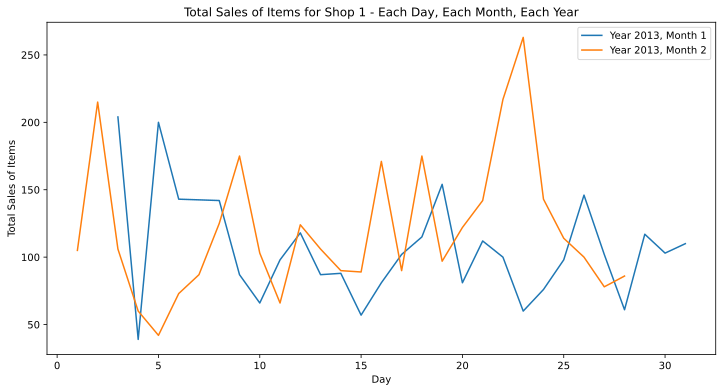

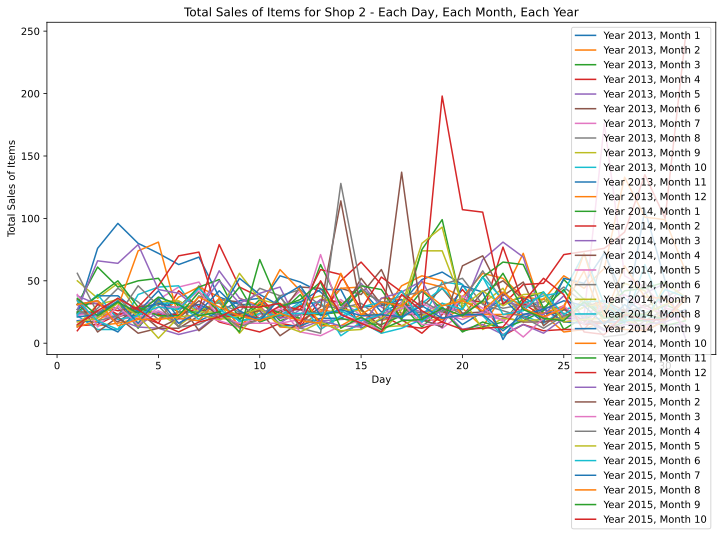

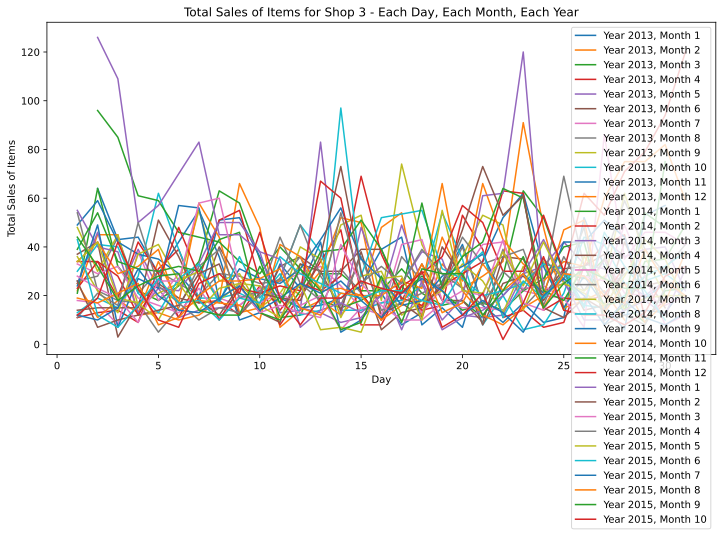

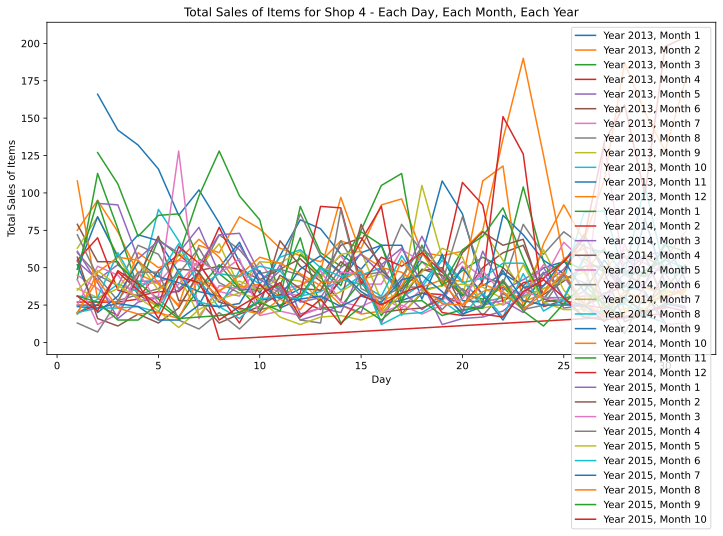

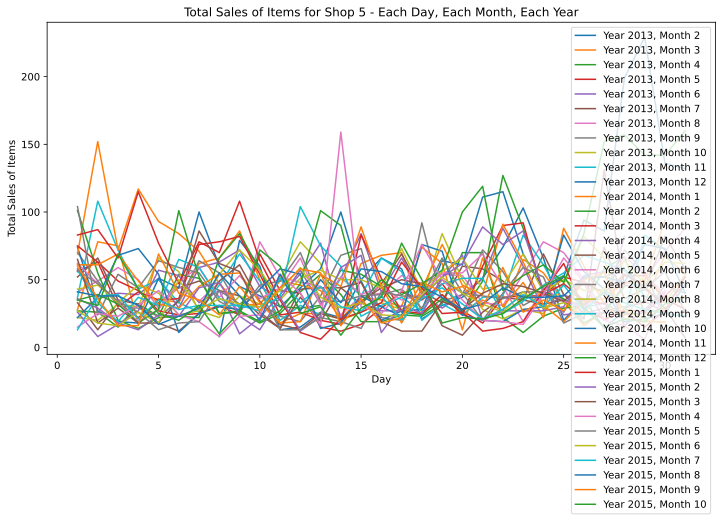

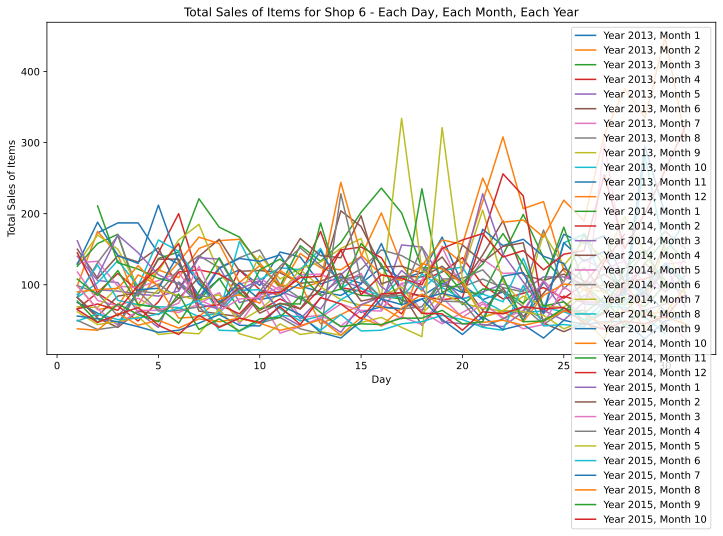

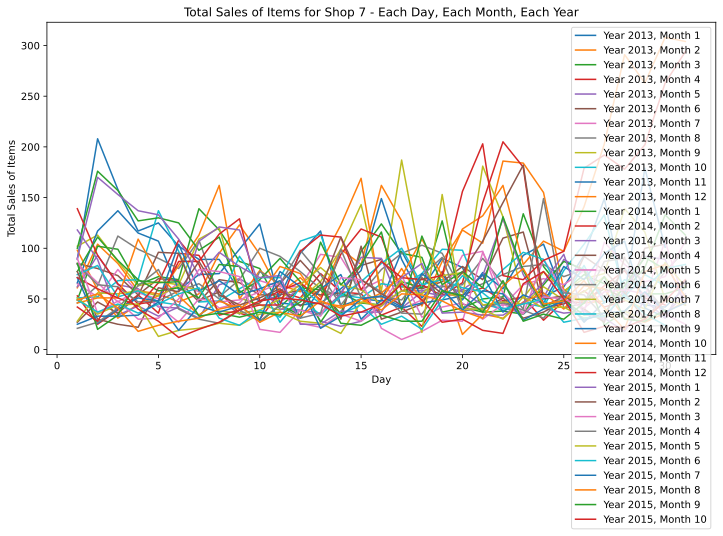

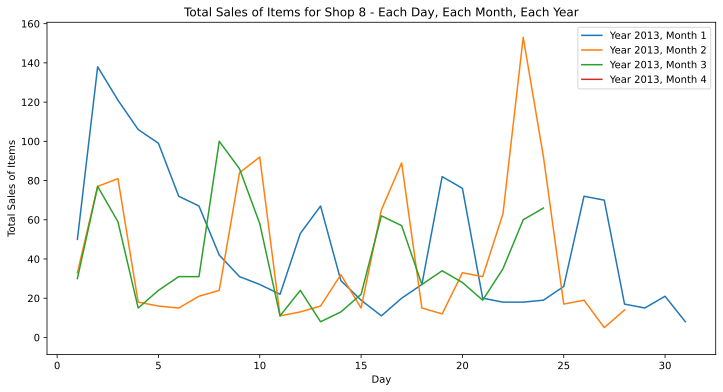

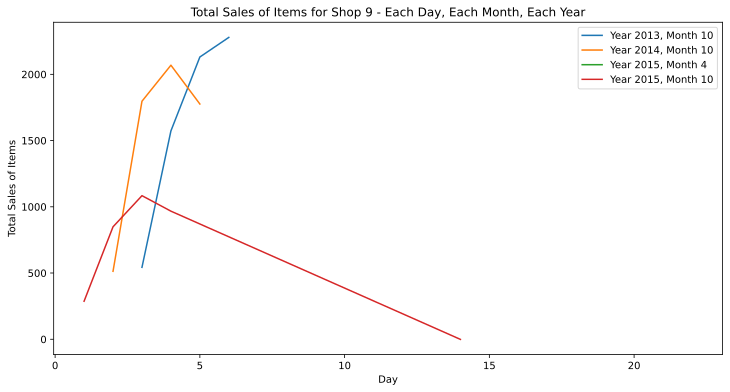

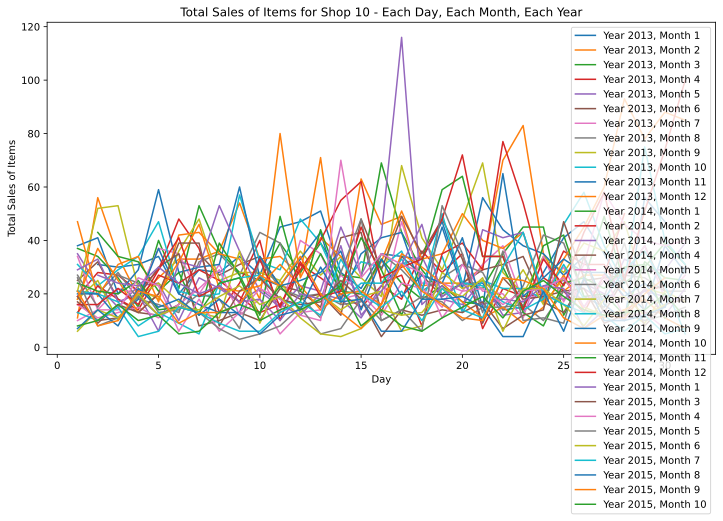

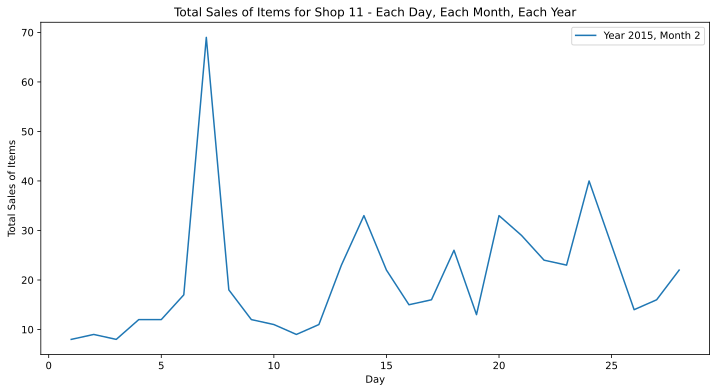

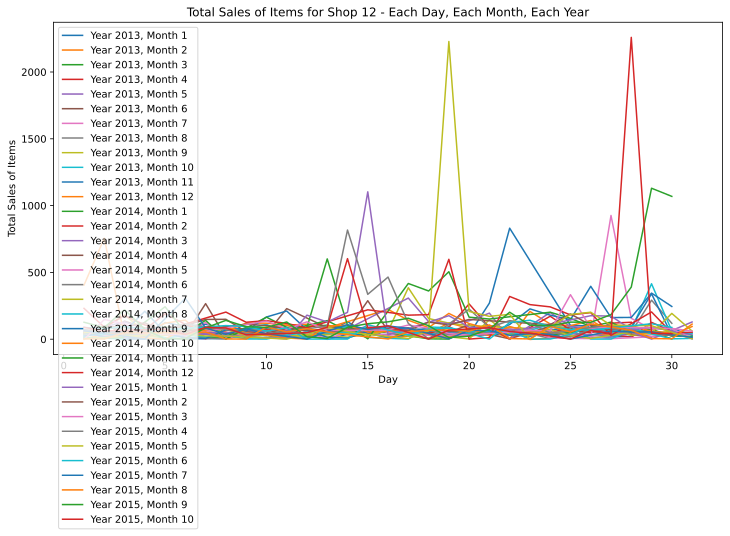

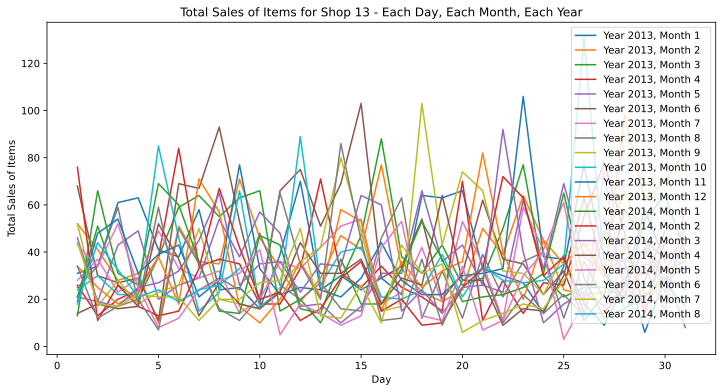

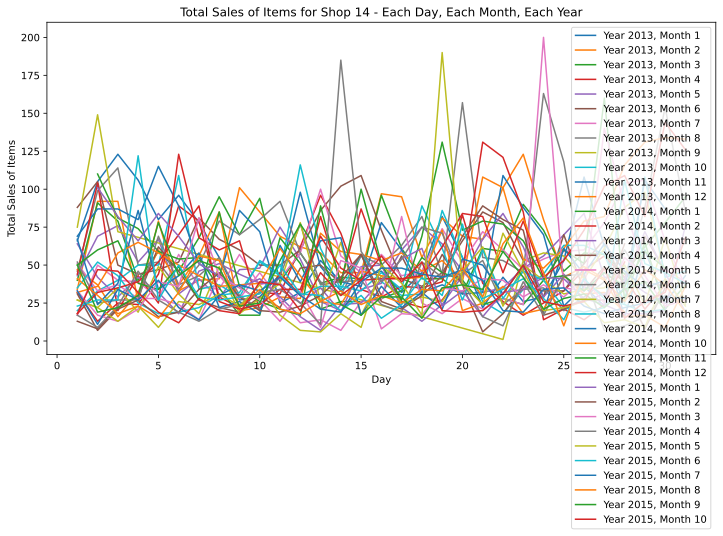

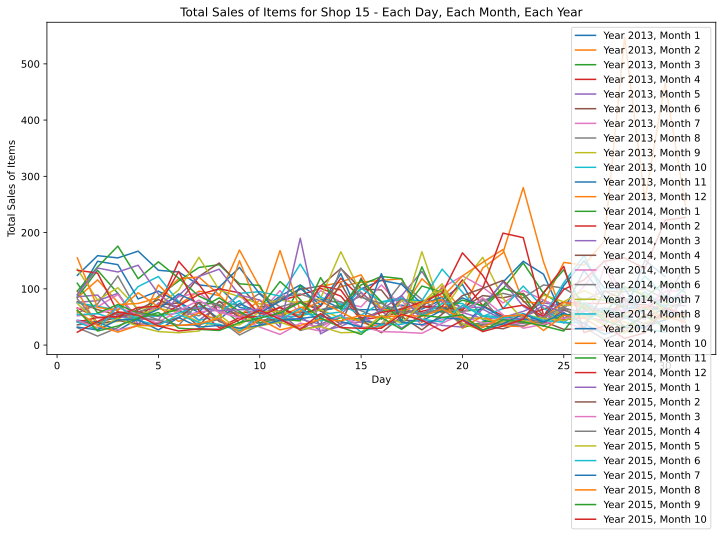

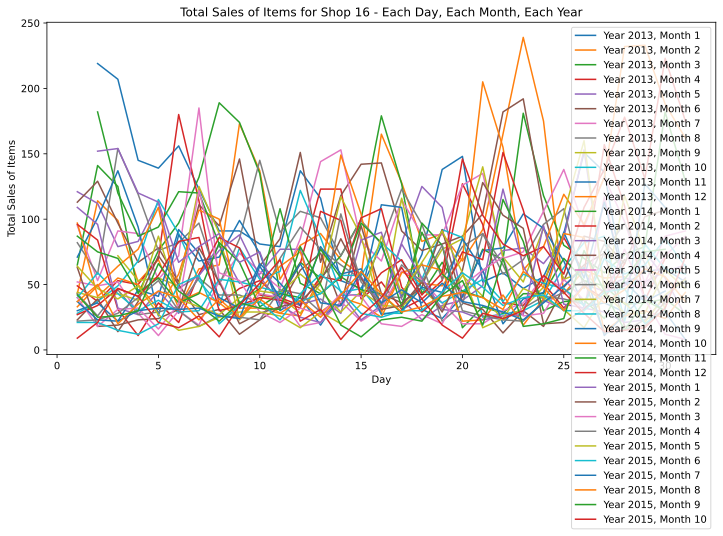

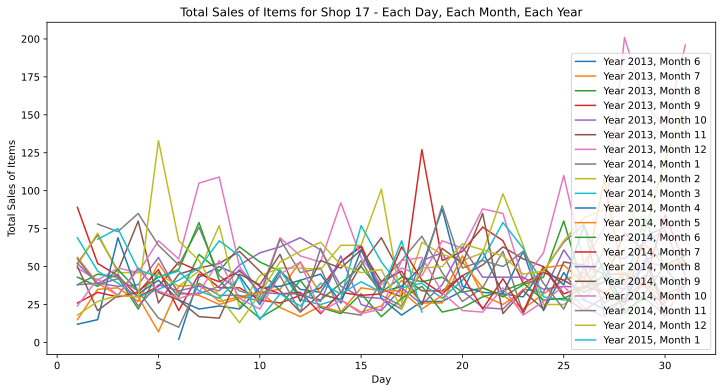

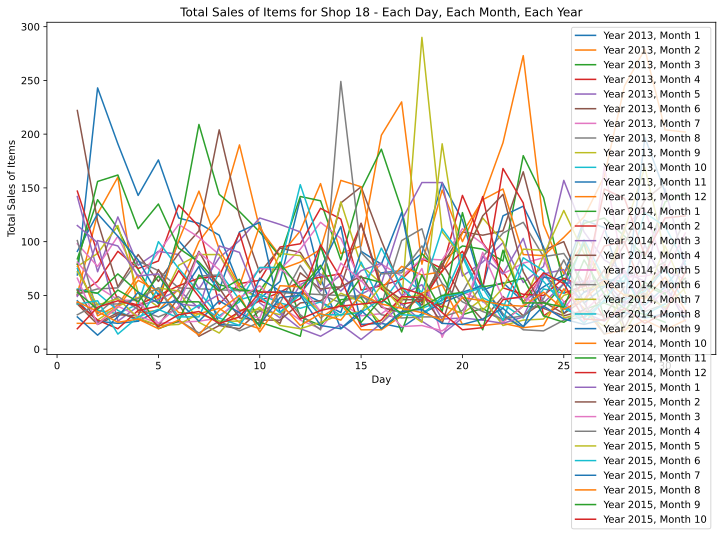

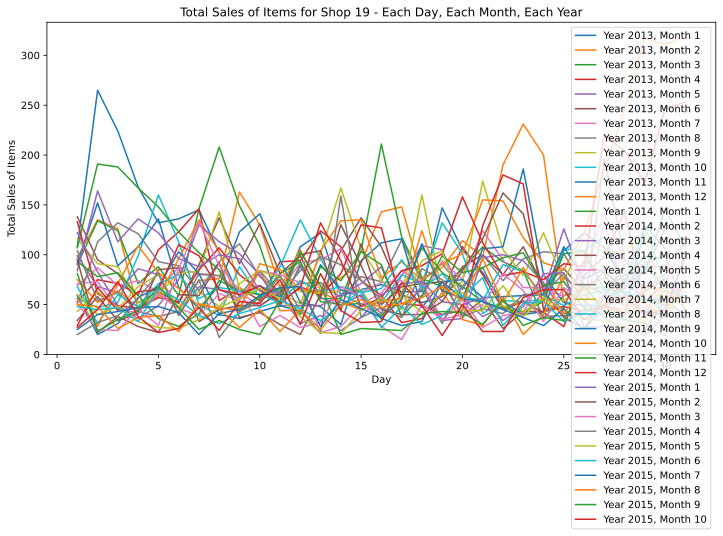

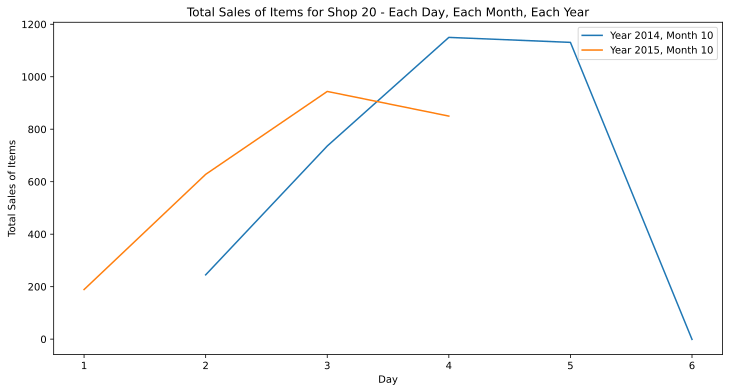

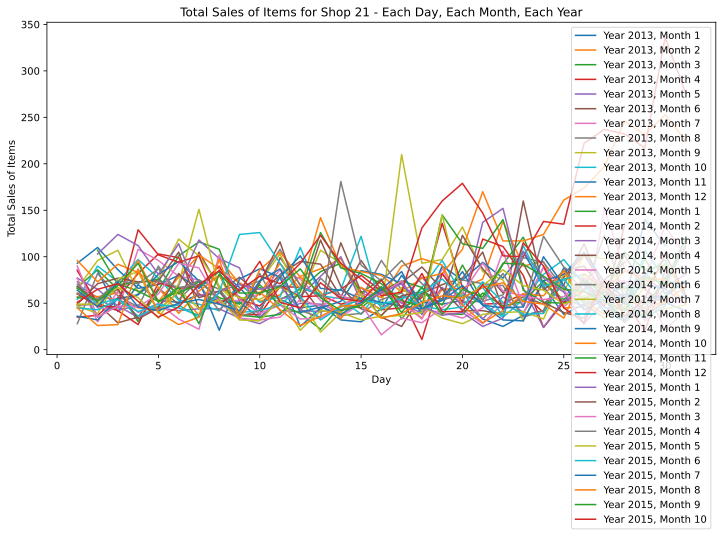

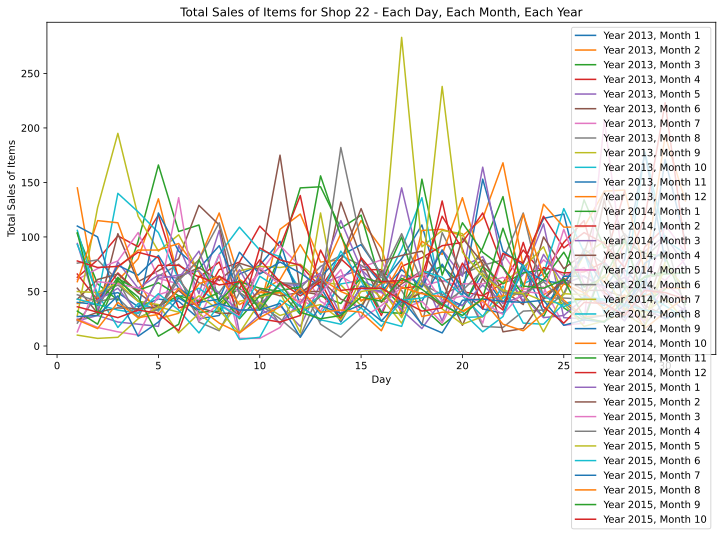

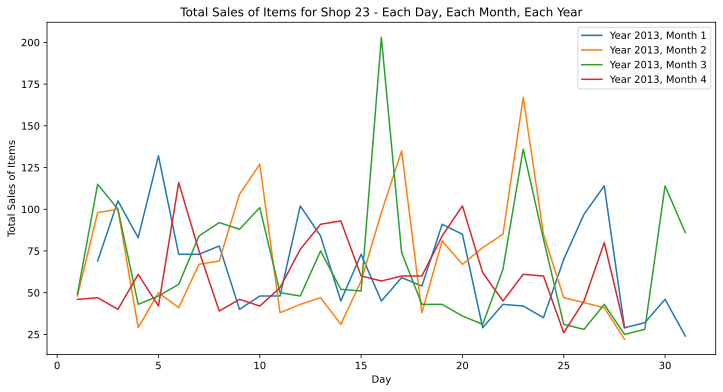

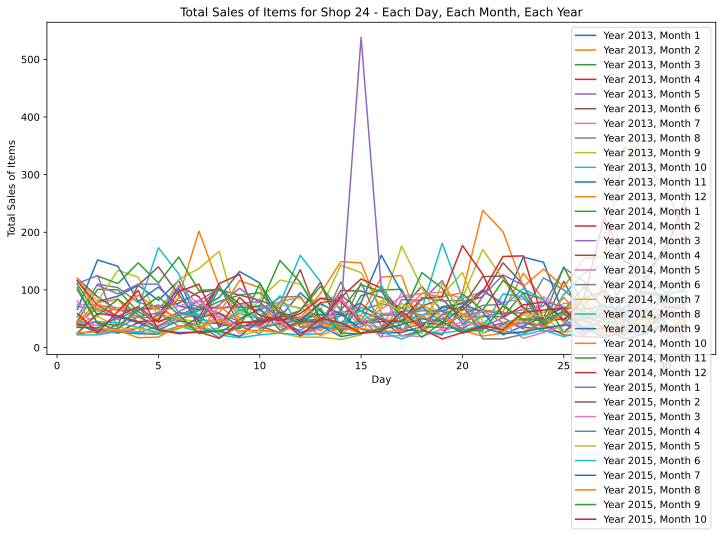

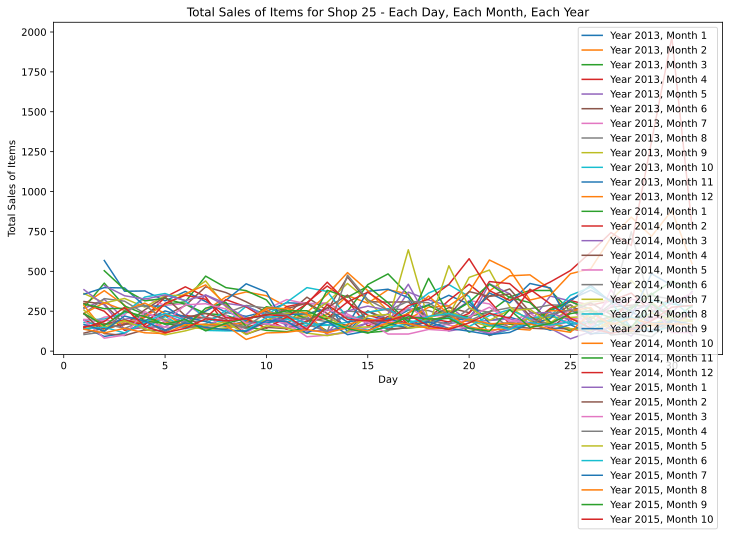

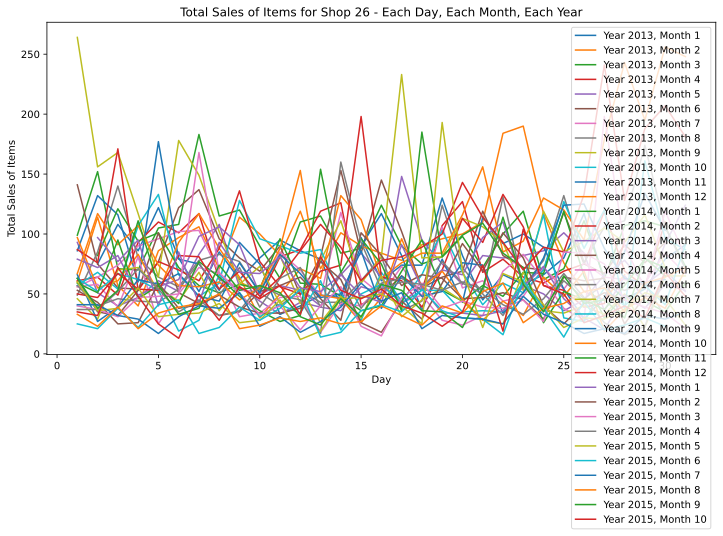

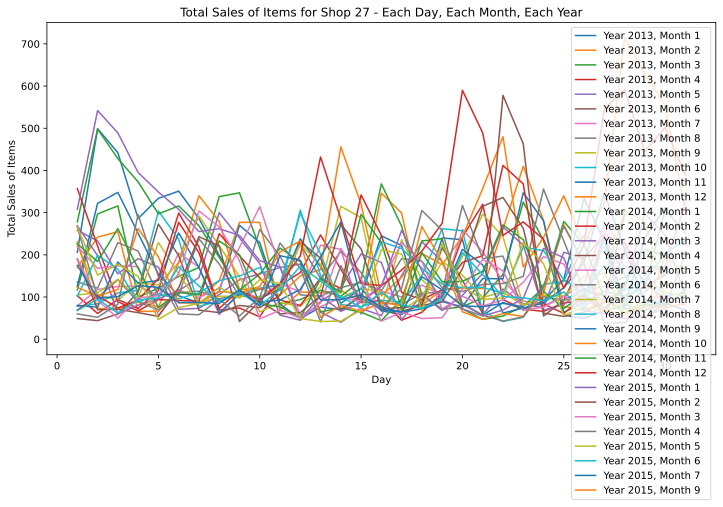

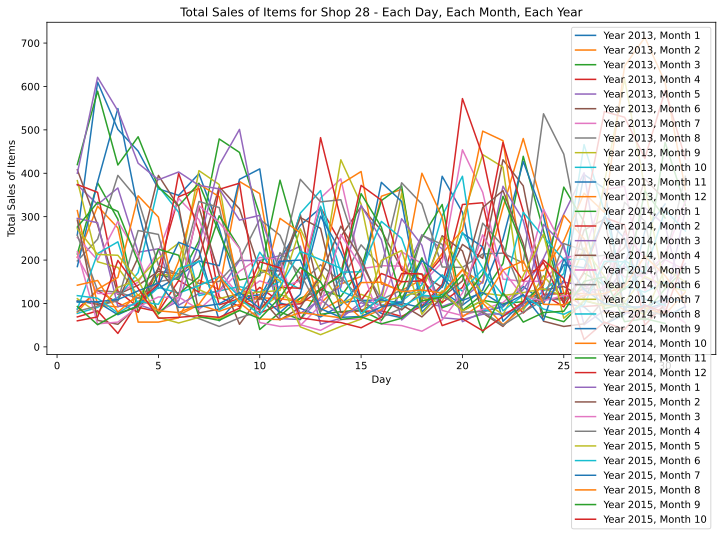

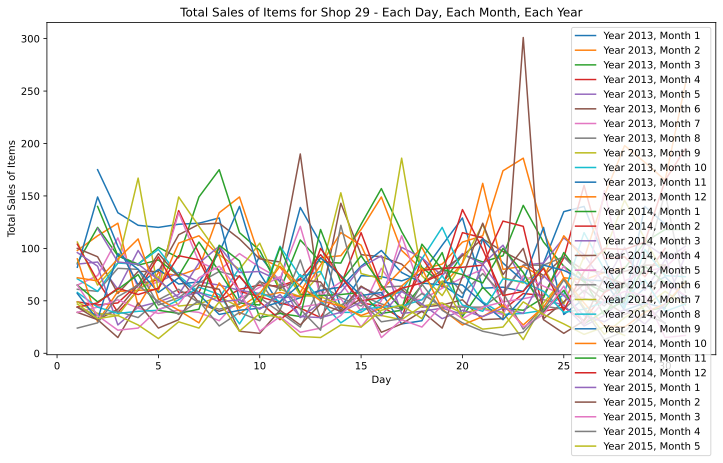

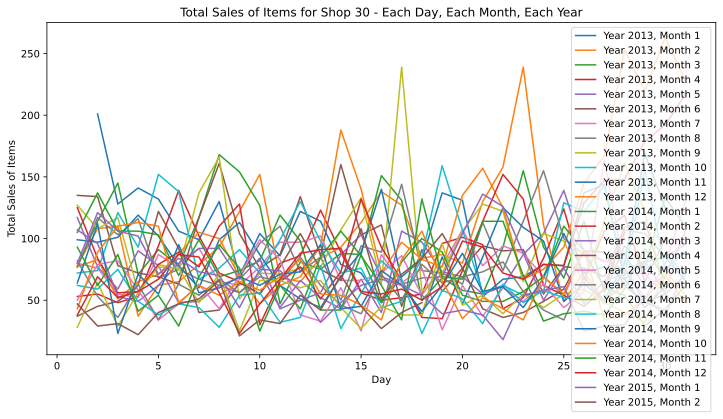

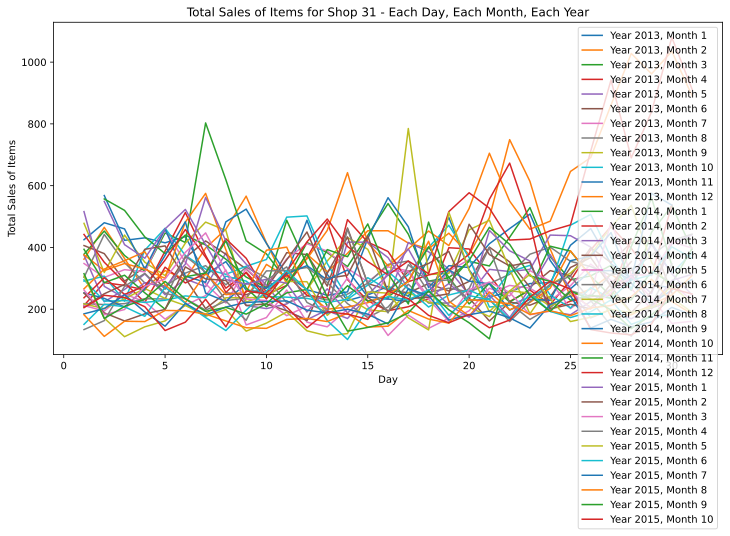

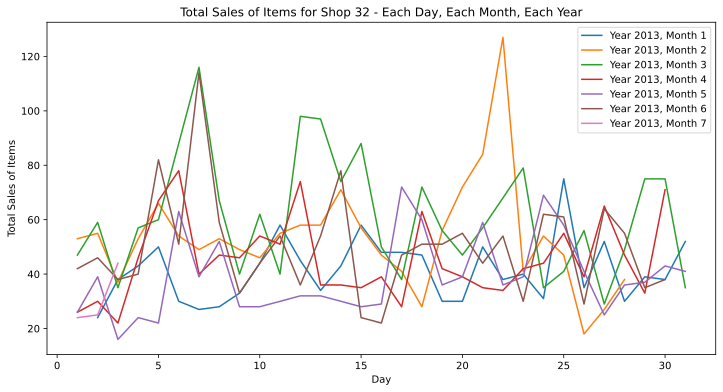

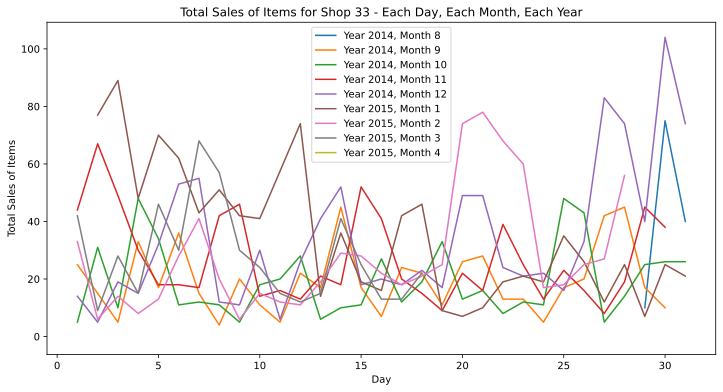

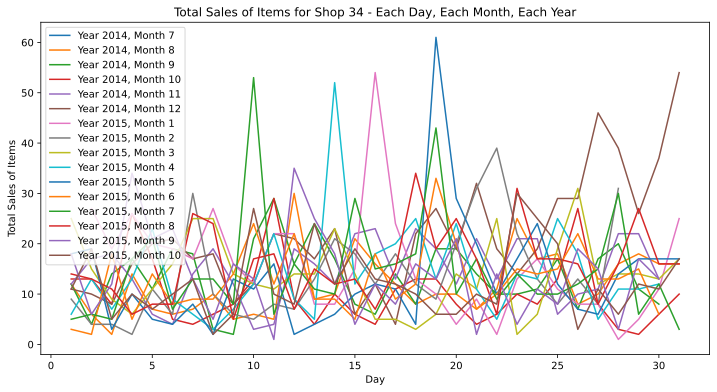

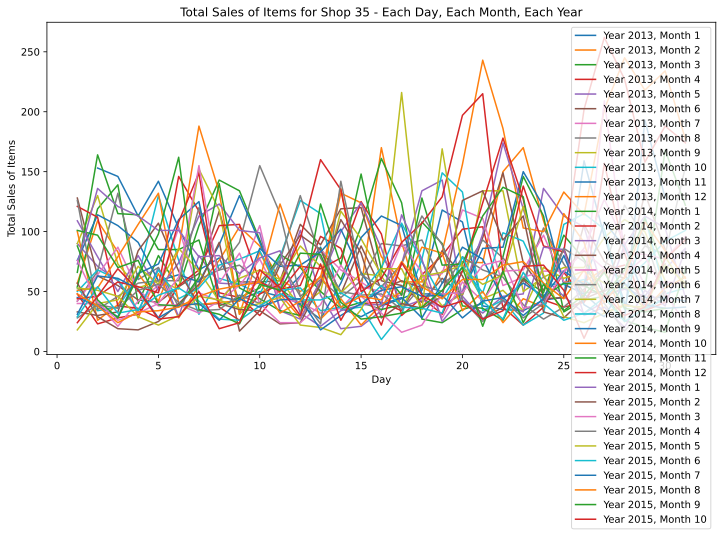

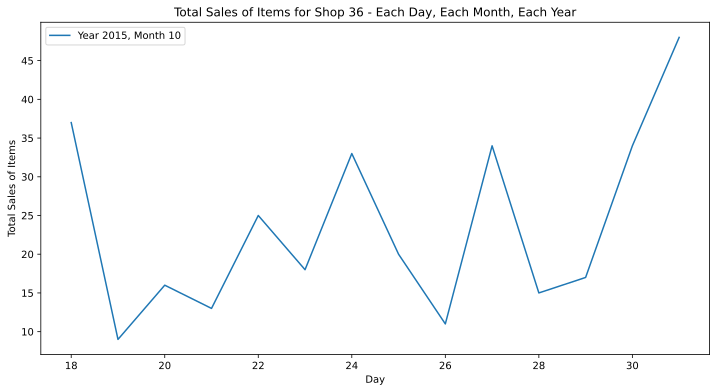

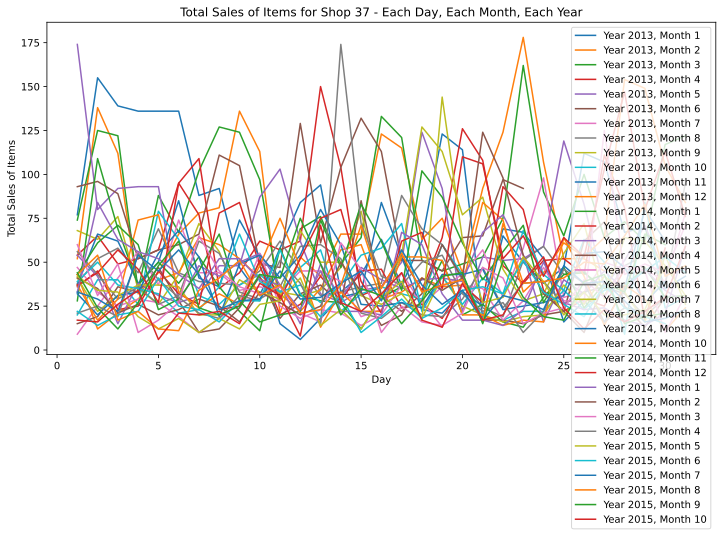

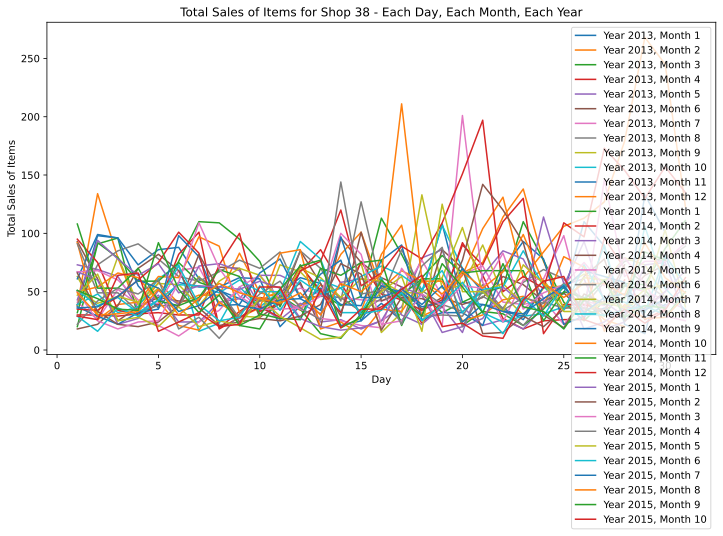

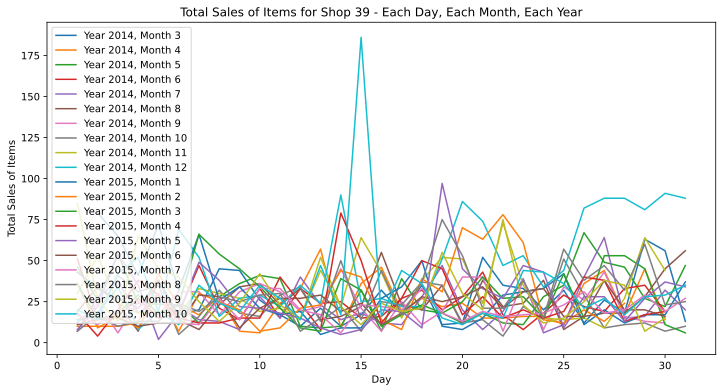

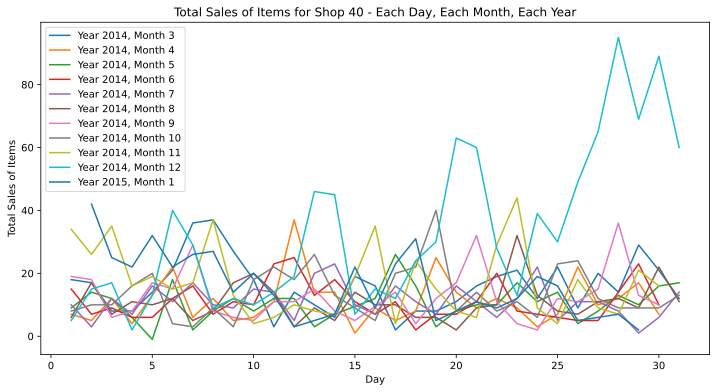

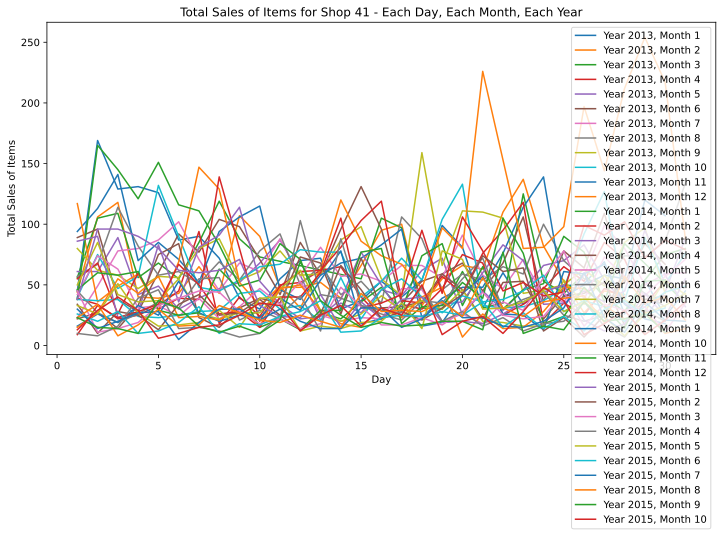

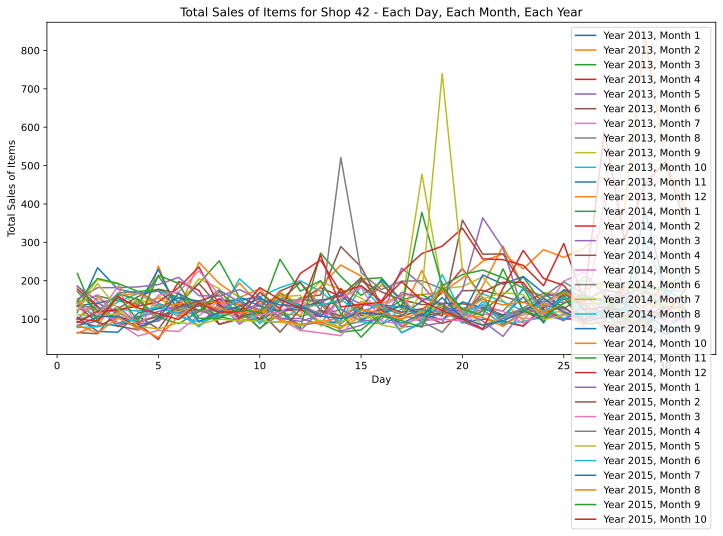

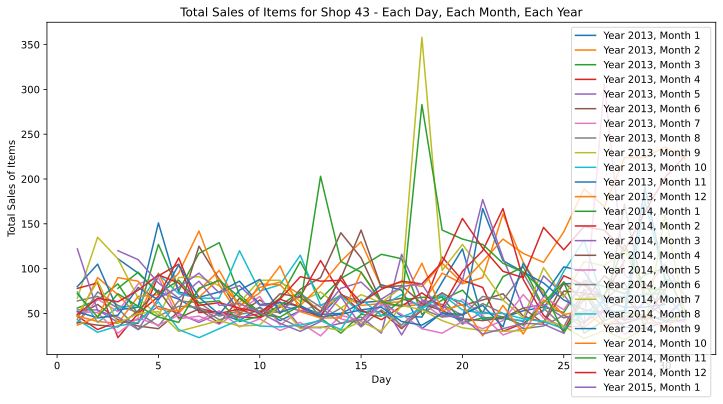

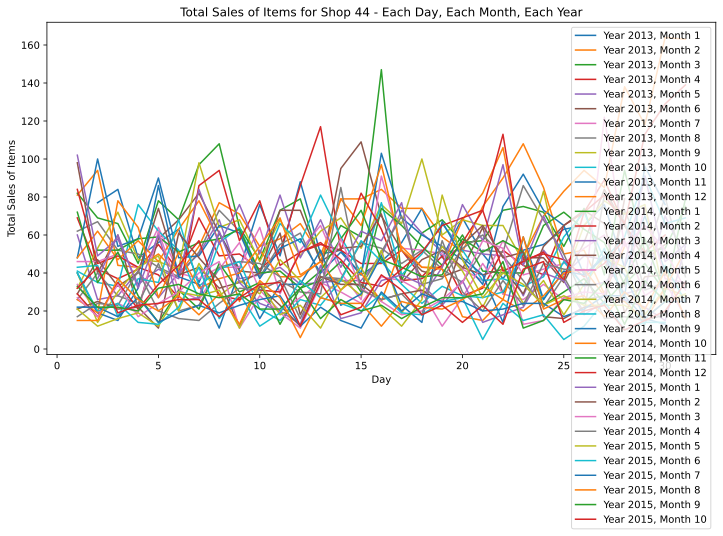

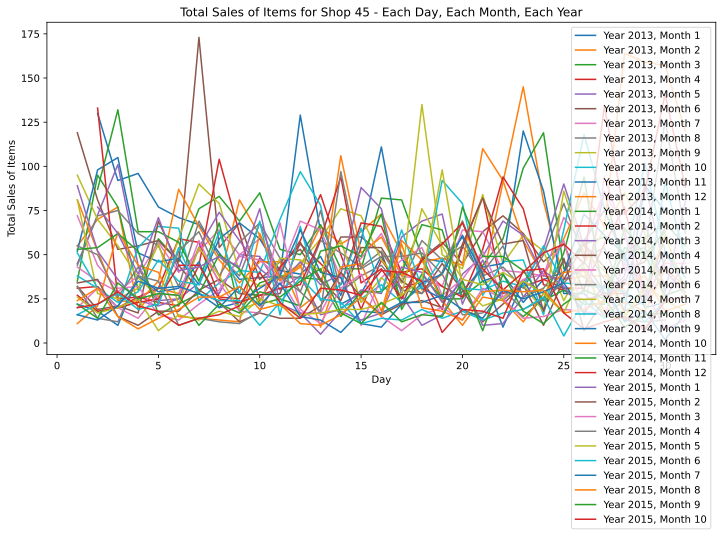

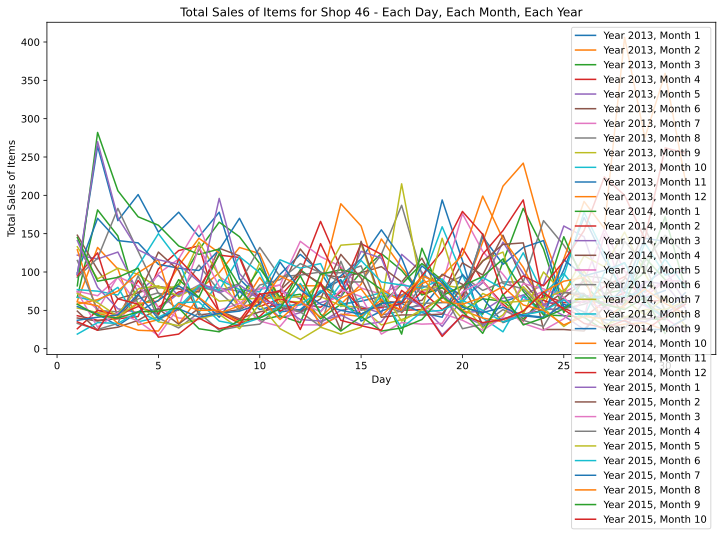

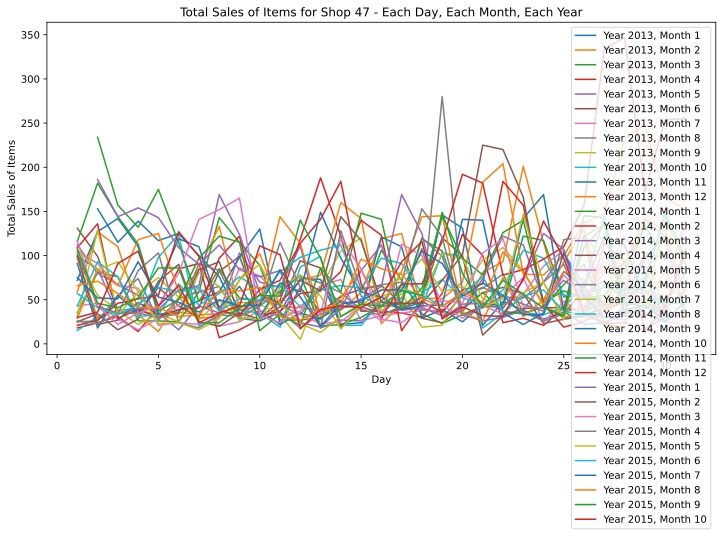

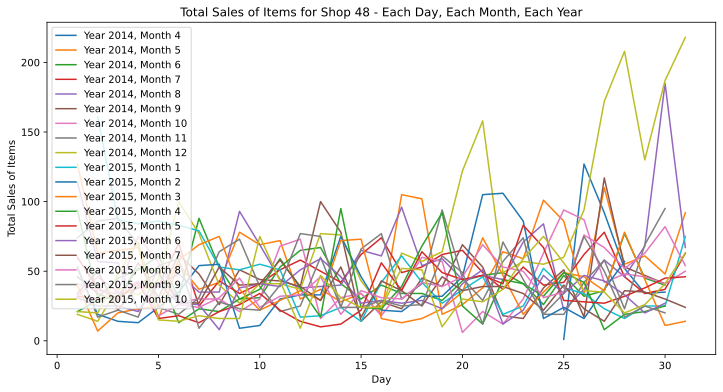

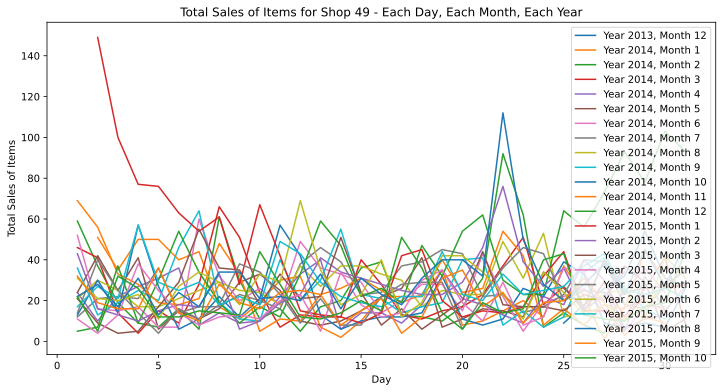

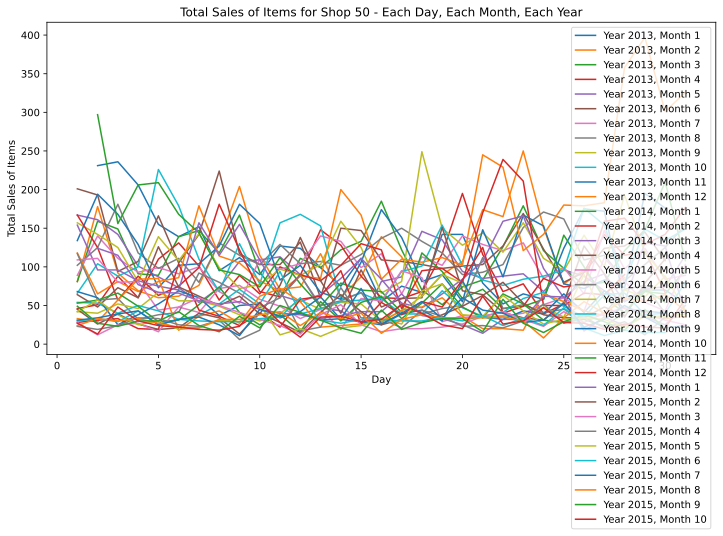

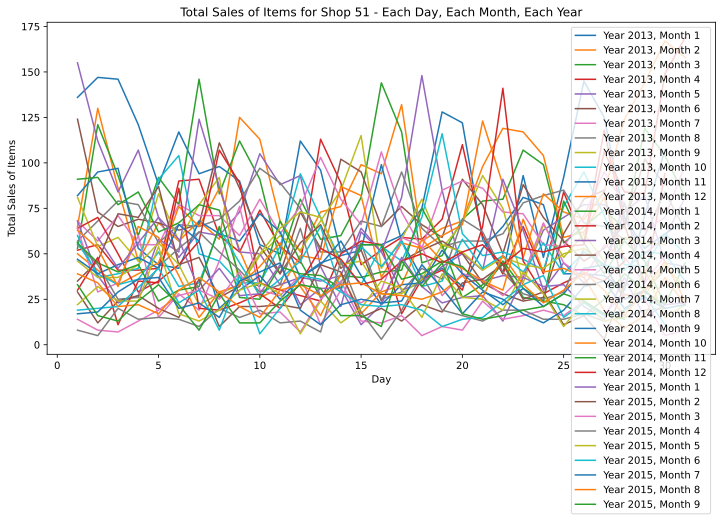

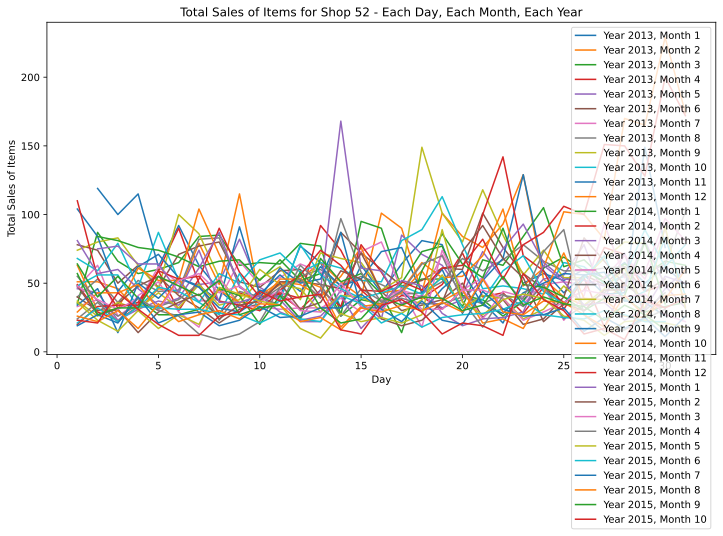

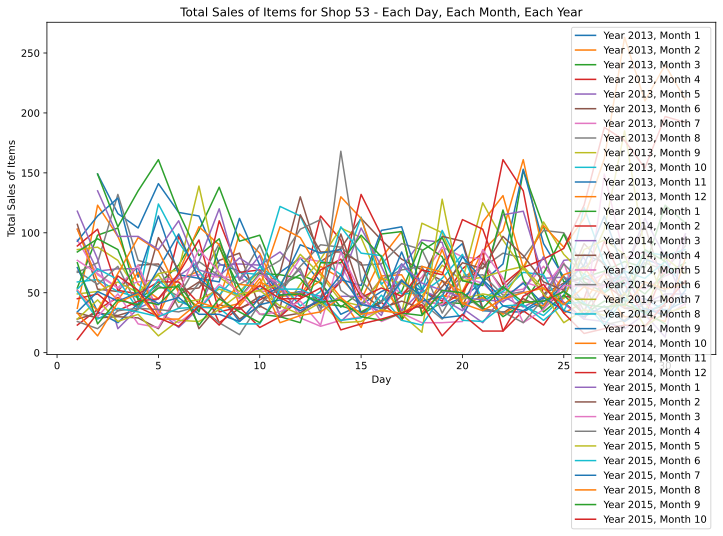

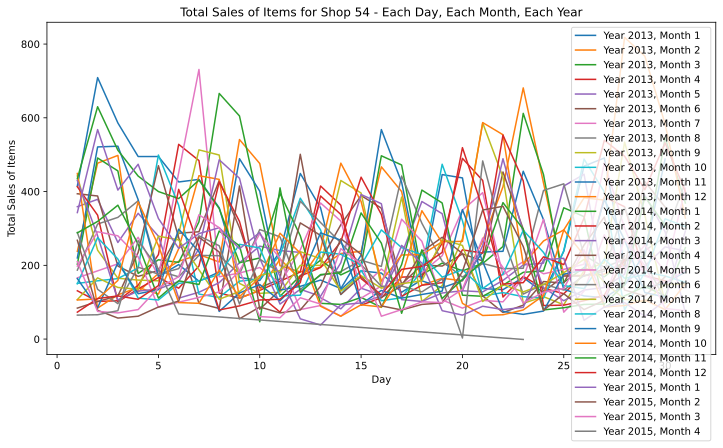

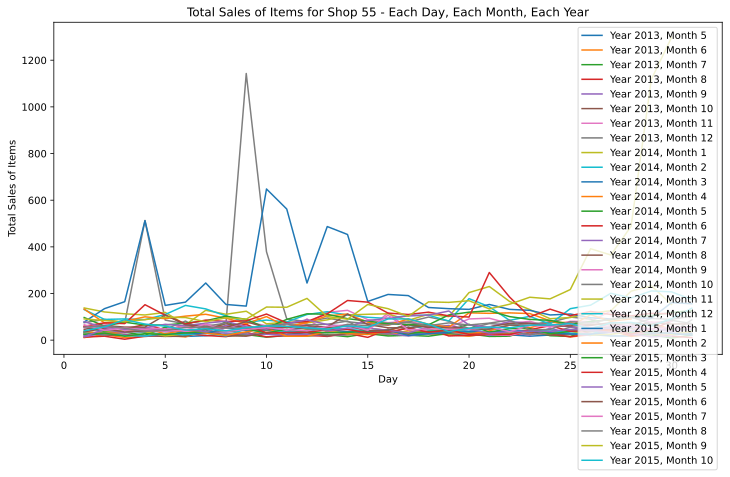

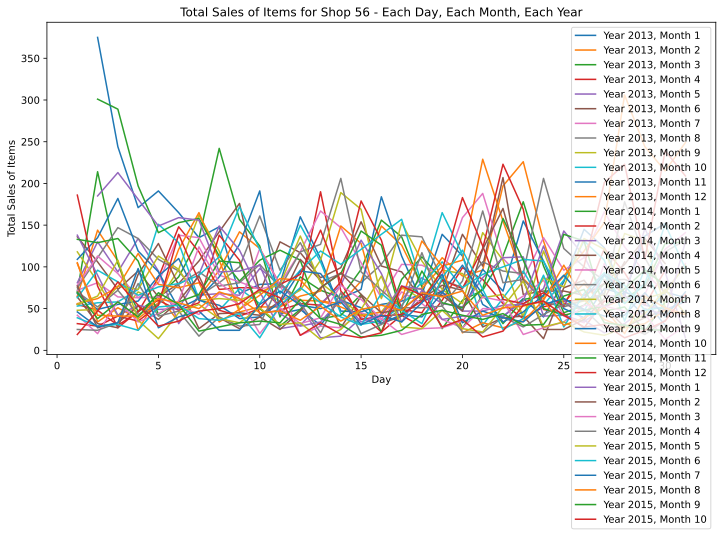

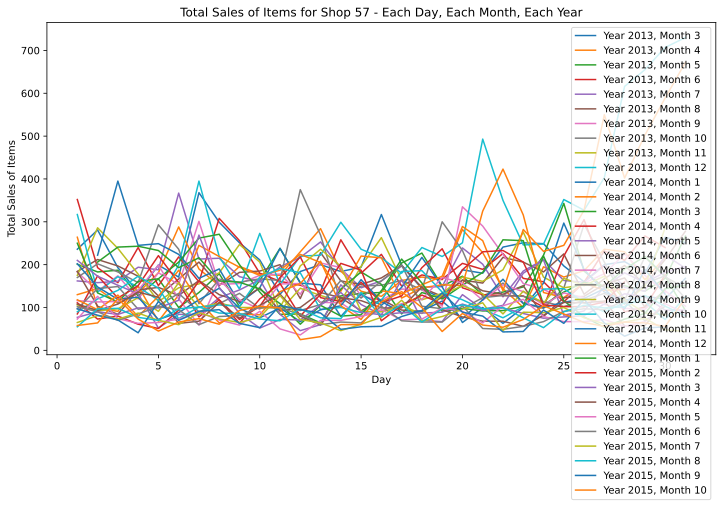

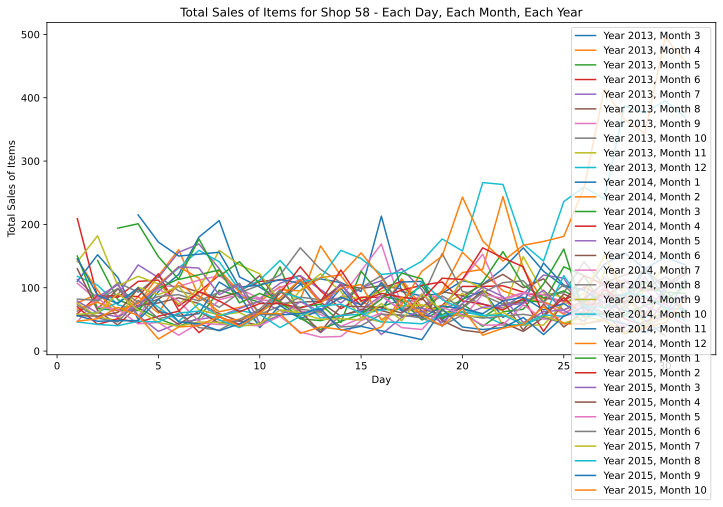

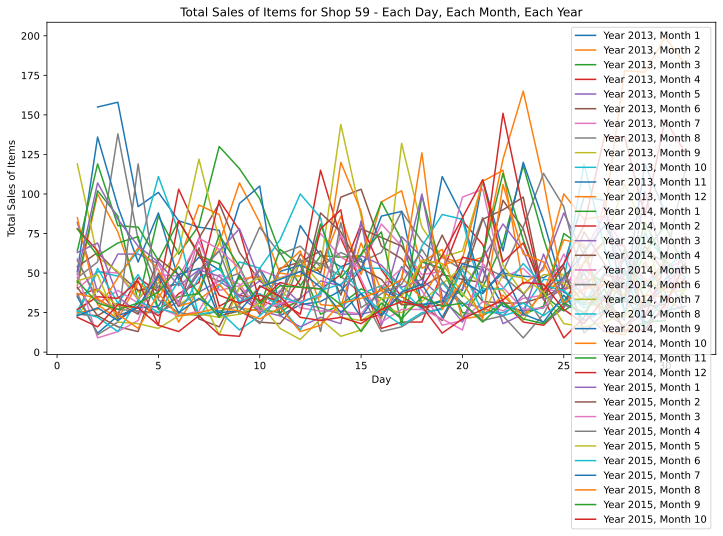

In [12]:
# Total sales for each shop,each day, each month in each year

# Convert the date column to datetime format
sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')

sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['day'] = sales['date'].dt.day

# Group the data by shop_id, year, month, day, and calculate the sum of item_cnt_day for each group
sales_by_shop_day_month_year = sales.groupby(['shop_id', 'year', 'month', 'day'])['item_cnt_day'].sum().reset_index()

# Iterate over each shop
for shop_id in sales_by_shop_day_month_year['shop_id'].unique():
    # Get the data for the current shop
    shop_data = sales_by_shop_day_month_year[sales_by_shop_day_month_year['shop_id'] == shop_id]

    # Plot the total sales of items for each day, each month, each year for the current shop
    plt.figure(figsize=(12, 6))
    for year in shop_data['year'].unique():
        year_data = shop_data[shop_data['year'] == year]
        for month in year_data['month'].unique():
            month_data = year_data[year_data['month'] == month]
            label = f"Year {year}, Month {month}"
            plt.plot(month_data['day'], month_data['item_cnt_day'], label=label)

    plt.xlabel('Day')
    plt.ylabel('Total Sales of Items')
    plt.title(f"Total Sales of Items for Shop {shop_id} - Each Day, Each Month, Each Year")
    plt.legend()
    plt.show()

In [13]:
# Group the data by shop_id and calculate the sum of item_cnt_day for each shop
items_sold = sales.groupby('shop_id')['item_cnt_day'].sum()

# Display the total number of items sold by each shop
print(items_sold)

shop_id
0      11705.0
1       6311.0
2      30620.0
3      28355.0
4      43942.0
5      42762.0
6     100489.0
7      67058.0
8       3595.0
9      15866.0
10     24523.0
11       572.0
12     73478.0
13     19763.0
14     46375.0
15     71201.0
16     61633.0
17     25838.0
18     65486.0
19     73455.0
20      5872.0
21     68560.0
22     60230.0
23      7705.0
24     63886.0
25    241920.0
26     67890.0
27    136657.0
28    184557.0
29     58713.0
30     60828.0
31    310777.0
32      8781.0
33      5482.0
34      6451.0
35     69016.0
36       330.0
37     46256.0
38     53886.0
39     16617.0
40      4943.0
41     49324.0
42    144934.0
43     50608.0
44     44938.0
45     41895.0
46     78990.0
47     67637.0
48     24909.0
49     17090.0
50     76238.0
51     48767.0
52     49744.0
53     61657.0
54    185790.0
55     63388.0
56     78079.0
57    141107.0
58     81734.0
59     48993.0
Name: item_cnt_day, dtype: float64


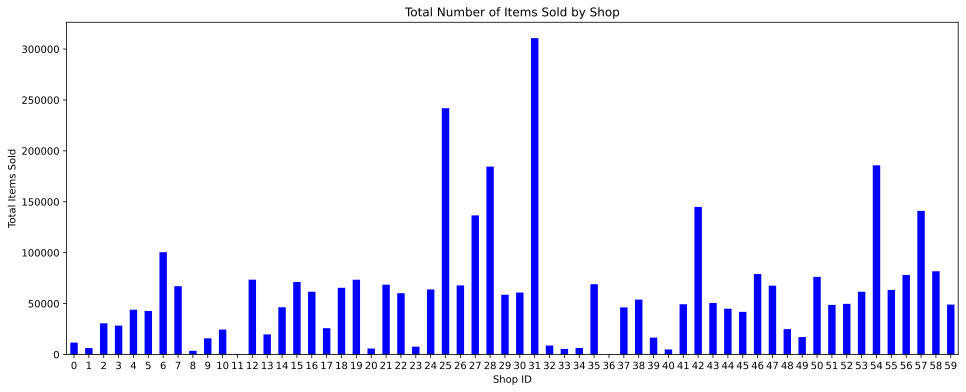

In [14]:
# Plot the total number of items sold by each shop
plt.figure(figsize=(16, 6))
items_sold.plot(kind='bar', color='blue')
plt.xlabel('Shop ID')
plt.ylabel('Total Items Sold')
plt.title('Total Number of Items Sold by Shop')
plt.xticks(rotation=0)
plt.show()

## Data Preparation

In [15]:
# Merge sales and items on item_id to get the category_id for each item
sales_with_category = pd.merge(sales, items[['item_id', 'item_category_id']], on='item_id')

# Group the data by item_category_id and get unique item_ids for each category
category_items = sales_with_category.groupby('item_category_id')['item_id'].unique()

# Display the category_id and corresponding item_ids
for category_id, item_ids in category_items.items():
    print(f"Category ID: {category_id}")
    print(f"Item IDs: {item_ids}")
    print()

Category ID: 0
Item IDs: [16257 16255 16256]

Category ID: 1
Item IDs: [5606 5740]

Category ID: 2
Item IDs: [ 5627  5629  5632  5635  5641  5643  5651  5649  5623  5613  5576  5610
  5612  5575  5574  5571  5572  5573 13517 13510  5628  5636  5609  5630
  5617  5642  5645 13070  5633 13456  5622 13535  5646 13536 13504 13414
  7228  5614  7227  7229  7154  5618  5570  7234  7153 13534  5626 13459
 13506  5644  5650 13069  5611  5648 13508  5625  5637  5639 13515  5624
  5616  5620 13516  5647  5621  5615 13411  5607  5608  5634  5619  5640
  7009  5638  5631]

Category ID: 3
Item IDs: [ 5652 13071  5671  5672  5663  5660  5655  5673  5664  5665  5669  5679
  5677  5657  5659  5661  5678  5674  5658  7232  7235  5662  5653  5666
  5654  7233  5675  5676  5670  5656  5668  7230  7231]

Category ID: 4
Item IDs: [ 1956  1958 13101 13102  3669  5680  5683  5682  3666  3667  3668  5681
  1955  1957  3111]

Category ID: 5
Item IDs: [5578 5581 5582 5583 5591 5592 5594 5595 5596 5599 5601 5604

In [16]:
# Check if there are any item IDs missing in the sales dataset

# Get the unique item IDs from sales dataset
sales_item_ids = set(sales['item_id'].unique())

# Get the unique item IDs from test dataset
test_item_ids = set(test['item_id'].unique())

# Find the missing item IDs in sales dataset
missing_item_ids = test_item_ids - sales_item_ids

"""
# Display the missing item IDs
print("Missing Item IDs:")
for item_id in missing_item_ids:
    print(item_id)
    """

'\n# Display the missing item IDs\nprint("Missing Item IDs:")\nfor item_id in missing_item_ids:\n    print(item_id)\n    '

In [17]:
# Filter items dataset for missing item IDs and retrieve category IDs
missing_item_categories = items.loc[items['item_id'].isin(missing_item_ids), 'item_category_id']


"""
# Display the missing item IDs and their corresponding category IDs
print("Missing Item IDs and their Category IDs:")
for item_id, category_id in zip(missing_item_ids, missing_item_categories):
    print("Item ID:", item_id, "Category ID:", category_id)
    """

# Filter items dataset for missing item IDs and retrieve category IDs
missing_item_categories = items.loc[items['item_id'].isin(missing_item_ids), ['item_id', 'item_category_id']]

# Create a new DataFrame with missing item IDs and category IDs
missing_items_df = pd.DataFrame(missing_item_categories, columns=['item_id', 'item_category_id'])

# Display the new DataFrame
print(missing_items_df)

       item_id  item_category_id
83          83                40
140        140                45
168        168                44
173        173                45
204        204                44
...        ...               ...
21974    21974                61
21975    21975                61
22022    22022                40
22035    22035                40
22137    22137                40

[363 rows x 2 columns]


In [18]:
# Unique Catagory ids in the missing_item_df

print(missing_items_df.item_category_id.unique())
len(missing_items_df.item_category_id.unique())

[40 45 44 54 77 78 76 49 55 58 56 20 31 28 29 19 23 30 24 75 67  0  3 65
 27 25 64  7 42 70 72 16 36 47 15 12 61 37 63]


39

In [19]:
# What shops sold these unique item_catagory_ids through out the whole period

# Merge sales and items data on 'item_id'
merged_data = pd.merge(sales, items, on='item_id')

# Get unique item_category_ids
unique_category_ids = merged_data['item_category_id'].unique()

# Initialize a dictionary to store the shops for each item_category_id
category_shop_dict = {}

# Iterate over unique_category_ids
for category_id in unique_category_ids:
    # Filter data for the current category_id
    category_data = merged_data[merged_data['item_category_id'] == category_id]
    # Get the unique shops for the current category_id
    unique_shops = category_data['shop_id'].unique()
    # Store the unique shops in the dictionary
    category_shop_dict[category_id] = unique_shops

# Display the unique item_category_ids and the corresponding shops
for category_id, shops in category_shop_dict.items():
    print("Item Category ID:", category_id)
    print("Shops:", shops)
    print()

Item Category ID: 37
Shops: [59 24 27 25  6 15  7 31 54 42 38 37 46 44 51 16  1  0 28 57 23 58 56 35
 47 21 22 19 18  8 30 41 45 32 29 50 53 43 17  2 52 13 14  3 10 12 26  5
  4 39 48 49 34 11 36 33  9 40]

Item Category ID: 58
Shops: [25  6 30  4 22 28 50 54 27 31 17 37 18 57 56 14 12 52 10 46 39 26  7 44
 42 58 15 21 19  8 43 45  5 47 53  2 16 32 59 41 38  3  1 24 35 48 13 23
 29 34 36 49 33 11 51]

Item Category ID: 56
Shops: [25 27 42  6 54 19 18 30 28 14 44 31 50 57 21 17 16  8 12 24 59 35 37 23
 15 46 56 52 58  7 29  3  4 47 51 45 22 53 13 39  0  1 10 32 38 26  5 41
 43 48  2 49 33 34 11]

Item Category ID: 59
Shops: [25 28  4  0 41 52 54  6  8 30 31 37 21 57 42 19 12 18 38 14 43 24 13 26
  5 16 27 44  2 56  7 22 46 17  3 29 35 47 15 59 58 51 50 10 53 23 32 45]

Item Category ID: 55
Shops: [25 28 27  6 14 30 54 51 46 50 52 18 21  8  0 31 26 29 37 57 56 47 12 53
 35 15  3  7 19 16 43 24 44 42 45 58 32 59 13 38  5  4  1 23 41  2 17 22
 10 49 39 48 33 11 36 34]

Item Category ID: 23

## Data Augmentation

###### The code provided is intended to fill in missing data for the item_ids of test dataset in the appended_sales dataset. The purpose of this code is to fill in the missing data for the missing item categories. With imputing the mean value of our target variable - item_cnt_dat in vacant places of newly added rows. To populate the dates for the newly generated rows, random dates spread randomly throughout the time period is used. By doing so, it ensured that the dataset is more representative and covers a broader range of item categories and shops. This is important for building accurate and robust predictive models that can generalize well to unseen data without allowing the data to skew.

In [20]:
# Finding the mean value of item_cnt_day in sales data
#print(sales.describe())

In [21]:
# Get the missing item categories
missing_categories = missing_items_df.item_category_id.unique()

# Create a new dataframe to store the appended data
appended_sales = sales.copy()

# Iterate over the missing categories
for category_id in missing_categories:
    # Get the shops that sold the current category
    shops = category_shop_dict[category_id]
    # Get the number of shops
    num_shops = len(shops)
    # Generate random dates
    start_date = pd.to_datetime('02-01-2013')
    end_date = pd.to_datetime('03-10-2015')
    random_dates = pd.to_datetime(np.random.choice(pd.date_range(start_date, end_date), num_shops, replace=True))
    # Get the item IDs for the current category
    category_items = missing_items_df[missing_items_df['item_category_id'] == category_id]['item_id'].unique()
    # Create new rows for each shop
    for i, shop_id in enumerate(shops):
        # Randomly select an item ID from the current category
        item_id = np.random.choice(category_items)
        # Randomly select a sales record for the current shop
        random_record = merged_data[(merged_data['shop_id'] == shop_id) & (merged_data['item_category_id'] == category_id)].sample(n=1)
        # Get the sales details
        item_price = random_record['item_price'].values[0]
        # Set the fixed item count for the current shop
        item_cnt_day = 1.2426 # mean value of item_count_day in sales data
        # Append a new row to the appended_sales dataframe
        appended_sales = appended_sales.append({
            'date': random_dates[i],
            'date_block_num': random_dates[i].month - 1,
            'year': random_dates[i].year,
            'month': random_dates[i].month,
            'day': random_dates[i].day,
            'shop_id': shop_id,
            'item_id': item_id,
            'item_price': item_price,
            'item_cnt_day': item_cnt_day
        }, ignore_index=True)


In [22]:
# Display the appended_sales dataframe
print(appended_sales)

              date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-02               0       59    22154      999.00   
1       2013-01-03               0       25     2552      899.00   
2       2013-01-05               0       25     2552      899.00   
3       2013-01-06               0       25     2554     1709.05   
4       2013-01-15               0       25     2555     1099.00   
...            ...             ...      ...      ...         ...   
2937561 2013-06-16               5        1    15418      392.00   
2937562 2013-02-01               1       33    15329      499.00   
2937563 2014-04-13               3       36    15418      509.00   
2937564 2015-01-27               0       23    15329     1199.00   
2937565 2014-03-26               2       11    15329      822.00   

         item_cnt_day  year  month  day  
0              1.0000  2013      1    2  
1              1.0000  2013      1    3  
2             -1.0000  2013      1    5  
3              

In [23]:
appended_sales.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02               0       59    22154      999.00           1.0   
1 2013-01-03               0       25     2552      899.00           1.0   
2 2013-01-05               0       25     2552      899.00          -1.0   
3 2013-01-06               0       25     2554     1709.05           1.0   
4 2013-01-15               0       25     2555     1099.00           1.0   

   year  month  day  
0  2013      1    2  
1  2013      1    3  
2  2013      1    5  
3  2013      1    6  
4  2013      1   15

In [24]:
for value in appended_sales['date_block_num'].unique():
    print(value)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [25]:
appended_sales.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'year', 'month', 'day'],
      dtype='object')

In [26]:
#features_df = pd.DataFrame(appended_sales, columns=['item_id', 'shop_id', 'date_block_num'])
#features_df

# Building Predictive Model

In [27]:
# Split the appended_sales dataset into features (X) and target variable (y)
X = appended_sales[['shop_id', 'item_id', 'date_block_num']]
y = appended_sales['item_cnt_day']

# Define the XGBoost model
model = xgb.XGBRegressor()

# Fit the model on the full appended_sales dataset
model.fit(X, y)

# Use the trained model to make predictions on the test dataset
test['date_block_num'] = 34  # Assuming the test data is for November 2015
test_predictions = model.predict(test[['shop_id', 'item_id', 'date_block_num']])

# Create a new DataFrame to store the test predictions
test_results = pd.DataFrame({'item_cnt_day': test_predictions})

# Output the test results to a CSV file
test_results.to_csv('test_predictions.csv', index=False)


In [28]:
#test_predictions_1 = pd.read_csv('test_predictions.csv')
#test_predictions_1.info()
#unique_values = test_predictions_1["item_cnt_day"].unique()
#print(unique_values)
#len(unique_values)